# Random Forest

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import QuantileTransformer

In [2]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[24]]

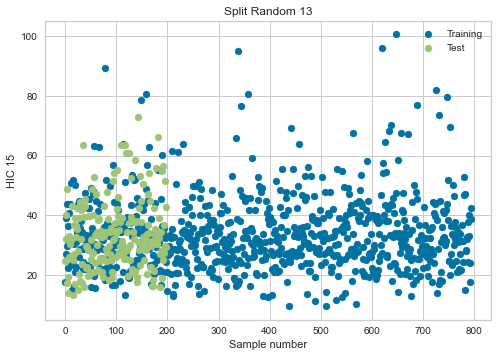

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


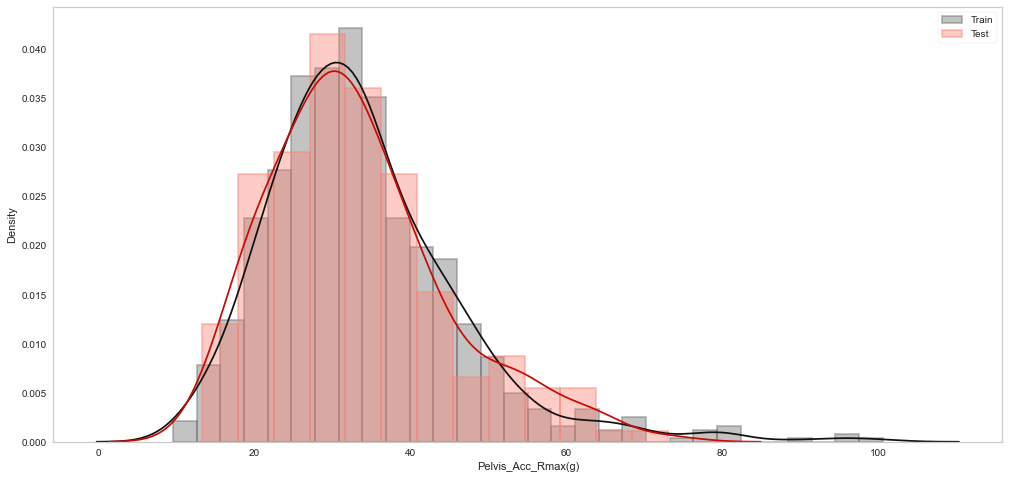

In [5]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[24]]
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=24)

plt.figure()
ind = np.arange(len(y)) 
plt.scatter(ind,y,label="Training")
ind = np.arange(len(y_Test))
plt.scatter(ind,y_Test,label="Test")
plt.title("Split Random 13")
plt.xlabel("Sample number")
plt.ylabel("HIC 15")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(17, 8))
sns.distplot(y,hist=True,color='k',hist_kws=dict(color='dimgray',edgecolor="dimgray", linewidth=2),label='Train')
sns.distplot(y_Test,hist=True,color='r',hist_kws=dict(color='salmon',edgecolor="salmon", linewidth=2),label='Test')
plt.legend(loc="best",frameon=True)
plt.grid( False)

In [8]:
# n_estimators = [160,180]
# max_features = ['auto','sqrt']
# max_depth = [19,20]
# min_samples_split = [3,4]
# min_samples_leaf = [3,4]
# criterion=['mse','mae']
n_estimators = [150,160,175,200]
# max_features = ['auto','sqrt']
max_depth = [3,4,5]
min_samples_split = [4,5,6]
min_samples_leaf = [2,3,4]
# criterion=['mse','mae']
# warm_start=[True,False]
# oob_score=[True,False]
# bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
#                'criterion': criterion,
#                'warm_start': warm_start,
#                'oob_score': oob_score,
#                'bootstrap': bootstrap
              }

In [14]:
# Use the random grid to search for best hyperparameters
dd=QuantileTransformer()
yv=y.to_numpy()
yv=yv.reshape(-1, 1)
yt=dd.fit_transform(yv)
# First create the base model to tune
rf = RandomForestRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,yt)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 108 is smaller than n_iter=150. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.2min finished
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [4, 5, 6],
                                        'n_estimators': [150, 160, 175, 200]},
                   random_state=42, verbose=2)

In [15]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=160)

In [3]:
modo=RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=180)

mod= TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))

In [4]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [5]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[24]]
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=23)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])


C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings

<Figure size 576x396 with 0 Axes>

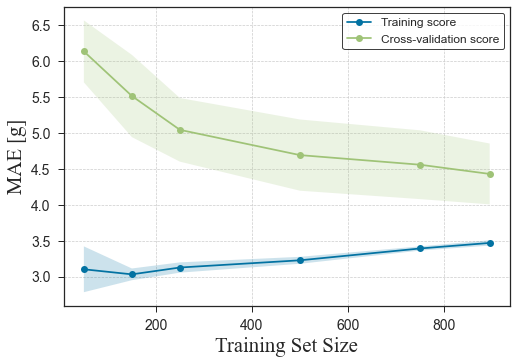

In [6]:

# train_mean=-np.mean(train_score,axis=1)
# train_std=-np.std(train_score,axis=1)
# test_mean=-np.mean(test_score,axis=1)
# test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE [g]", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('pelRfLC', bbox_inches="tight")
plt.show()

In [7]:
pd.DataFrame(test_mean)

,0
0,6.135565
1,5.514255
2,5.042826
3,4.691028
4,4.557175
5,4.428796


In [7]:
X = X.to_numpy()
y = y.to_numpy()


In [8]:
y_Test=y_Test.to_numpy()

In [9]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.706045



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 6.203654



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.318347



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 9.698731



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 7.921020



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 6.920087



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.902500



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.233363



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.025388



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 10.332150

error COV--->0    0.902364
dtype: float64  error mean --->0    4.002327
Name: mean, dtype: float64  error std --->0    3.611555
Name: std, dtype: float64


# train score

In [10]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.212352
dtype: float64  error mean --->0    3.553607
Name: mean, dtype: float64  error std --->0    4.308221
Name: std, dtype: float64


In [11]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.665049
std,5.546344
min,-12.663868
25%,-2.426458
50%,-0.075636
75%,2.891135
max,58.966578


In [12]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,0.231344
std,5.393428
min,-11.860000
25%,-3.354493
50%,-0.102255
75%,3.088278
max,30.872907


In [24]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('Rfunseen.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('Rftrain.csv')

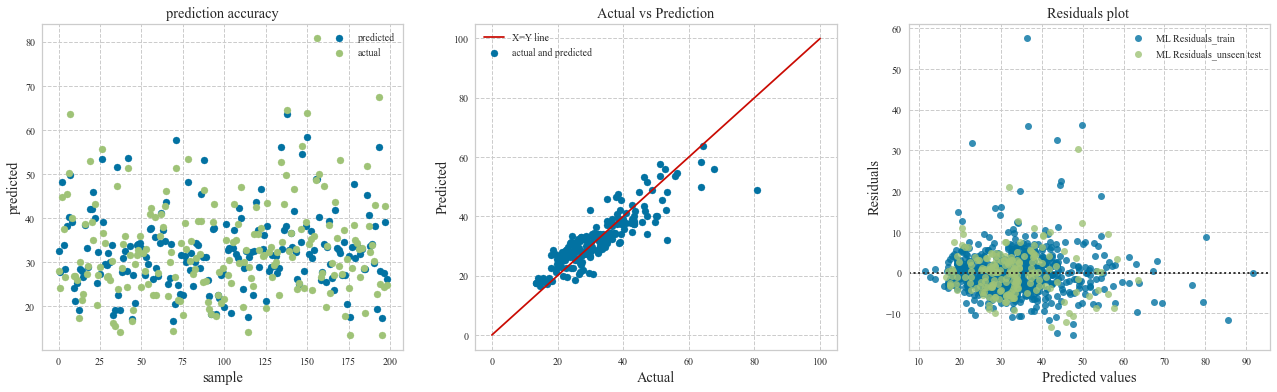

In [33]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,100],[0,100],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

# Gradient

In [8]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor

In [9]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[24]]

In [29]:
random_grid = {"learning_rate"   : [0.05,0.06,0.065],
             "subsample"        : [0.1,0.2,0.3],
             "n_estimators": [200,250,300],
             'max_depth'        : [2,3,4],
             "max_features"     : ['auto', 'sqrt'],
             "min_samples_split": [0.1,0.15,0.2],
             "min_samples_leaf" : [0.05,0.055,0.06]
             }

In [30]:
dd=QuantileTransformer()
yv=y.to_numpy()
yv=yv.reshape(-1, 1)
yt=dd.fit_transform(yv)
rf = GradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 400, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,yt)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  1.9min finished
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=400,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.06, 0.065],
                                        'max_depth': [2, 3, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [0.05, 0.055, 0.06],
                                        'min_samples_split': [0.1, 0.15, 0.2],
                                        'n_estimators': [200, 250, 300],
                                        'subsample': [0.1, 0.2, 0.3]},
                   random_state=42, verbose=2)

In [31]:
rf_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.06, max_depth=4, max_features='auto',
                          min_samples_leaf=0.05, min_samples_split=0.1,
                          n_estimators=200, subsample=0.3)

In [10]:
modo=GradientBoostingRegressor(learning_rate=0.025, max_depth=3, max_features='auto',
                          min_samples_leaf=0.05, min_samples_split=0.1,
                          n_estimators=300, subsample=1)
mod= TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))

In [11]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [12]:
y_actual = []
predict = []
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[24]]
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=23)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])


C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings

<Figure size 576x396 with 0 Axes>

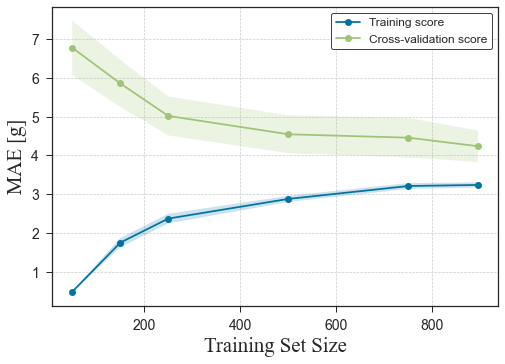

In [13]:

# train_mean=-np.mean(train_score,axis=1)
# train_std=-np.std(train_score,axis=1)
# test_mean=-np.mean(test_score,axis=1)
# test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE [g]", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('pelGRLC', bbox_inches="tight")
plt.show()

In [14]:
pd.DataFrame(test_mean)

,0
0,6.780107
1,5.858895
2,5.019064
3,4.545761
4,4.457629
5,4.237200


In [20]:
X = X.to_numpy()
y = y.to_numpy()

In [21]:
y_Test=y_Test.to_numpy()

In [22]:
kf=cv
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.653820



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.435436



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.534805



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 9.290555



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 7.831122



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 6.336277



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.833723



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.217104



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.932660



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 9.448742

error COV--->0    0.889768
dtype: float64  error mean --->0    3.836901
Name: mean, dtype: float64  error std --->0    3.413953
Name: std, dtype: float64


# train score

In [23]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.27884
dtype: float64  error mean --->0    3.233785
Name: mean, dtype: float64  error std --->0    4.135495
Name: std, dtype: float64


In [24]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.539984
std,5.223111
min,-15.205268
25%,-2.315113
50%,-0.114167
75%,2.344244
max,60.929578


In [25]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,0.356393
std,5.130651
min,-9.923957
25%,-2.968799
50%,-0.305937
75%,2.972961
max,25.653386


In [39]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('grunseen.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('grtrain.csv')

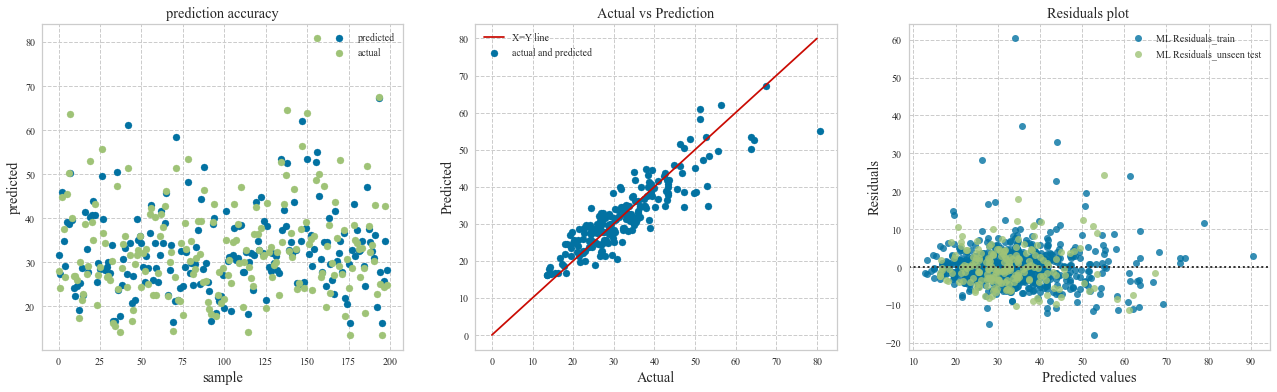

In [129]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,80],[0,80],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()